# Predictive Maintenance Dataset Analysis

## Introduction

The Artificial Intelligence for Industry 4.0 dataset was found on UCI Machine Leaning Repository provided by (Matzka, 2020). This dataset was produced for predictive maintenance modelling analysis by Matzka's team. It captured various machine operating conditions and failure events, so that data scientists and engineers can build fault detection models and predict machine failures. Predictive maintenance is an essential component of Industry 4.0 (Cachada et al, 2018). By applying machine techniques to the dataset, we can effectively predict the failure before they happen, thus to reducing downtime, and improve asset reliability and cost control.

With the data, I came up with the following questions and tried to discuss them in the findings:
1. How does each failure mode contribute to overall machine failure?
2. What is the distribution of each product quality, and how are they relate to various failure rates?
3. How does each product quality type experience each failure mode differently?
4. How does tool wear progress over time? Can we find an optimal replacement threshold before failure occur?
5. Does power failure more likely to happen at a speicifc torque and speed point? Can we determine a threshold where failures about to happen?
6. Can we predict probability of failure by using the process parameters?


## About the Dataset

The Artificial Intelligence for Industry 4.0 dataset has 10,000 data points and 14 columns of features. 

In [12]:
ai.shape

(10000, 14)

Among the 14 features, 7 of them are operational parameters: 

**UID:** Unique ID for datapoint from 1 to 10,000

**Product ID:** A unique identifier for different manufactured products with a letter prefix indicating product quality (L,M,H).

**Type:** Product quality type with Low, Medium, and High quality.

**Air Temperature:** External temperature of the air measured in the unit of Kelvin.

**Process Temperature:** Internal temperature of process, measured in the unit of Kelvin.

**Rotational Speed:** Calculated from a power of 2860W, in the unit of revolutions per minute (rpm).

**Torque:** The torque applied to machine in Newtons-meter with no negative values.

**Tool Wear:** The cumulative wear of the tool in minutes.

There are five different machine failure modes:

**Machine Failure:** The overall machine failure label indicating whether the machine has failed or not in a particular datapoint. it's in binary type with "1" indicating failure, "0" indicating no failure. 

**Tool Wear Failure (TWF):** The tool will need to be replaced or fail at a random datapoint, with "1" indicating failure, and "0" indicating no failure.

**Heat Dissipation Failure (HDF):** Heat dissipation can cause a process failure at a datapoint, with "1" indicating failure, and "0" indicating no failure.

**Power Failure (PWF):** The product of torque and rotational speed (in rad/s)
equals the power required for the process, with "1" indicating failure, and "0" indicating no failure.

**Overstrain Failure (OSF):** The process fails due to overstrain, with "1" indicating failure, and "0" indicating no failure. This is true for 98 datapoints. 

**Random Failure (RNF):** each process has a chance of 0, 1 % to fail regardless of its process parameters due to unknown and unpredictable factors. 

## Data Cleaning

An inspection was implemented on the dataset to see if there is any null values or missing values:

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
ai=pd.read_csv('/Users/admin/Downloads/ai4i2020.csv')

In [15]:
test=ai.isnull().sum()
print(test)

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


Perfect! There is no null values, we can proceed to our analysis.

## Discussion

## How Does Each Failure Mode Contribute to Overall Machine Failure?

First, we would like to know what is the overall machine failure rate from the dataset.

In [15]:
machine_failure=ai['Machine failure'].mean()*100
print("The overall machine failure rate is:", machine_failure,"%")

TWF     46
HDF    115
PWF     95
OSF     98
RNF     19
dtype: int64
The overall machine failure rate is: 3.39 %


The overall machine failure rate is: 3.39 %. Then we want to see what is the occurence for each failure mode separatly: 

TWF     46
HDF    115
PWF     95
OSF     98
RNF     19
dtype: int64


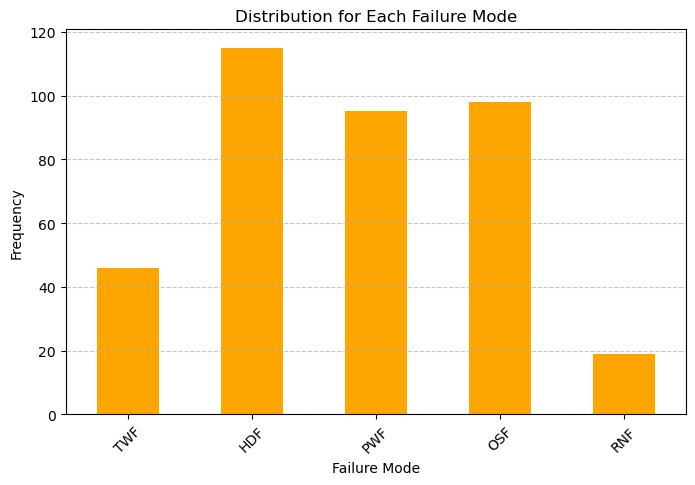

In [45]:
failure=ai[['TWF','HDF','PWF','OSF','RNF']].sum()
print(failure)


plt.figure(figsize=(8,5))
failure.plot(kind='bar',color='orange')
plt.title('Distribution for Each Failure Mode')
plt.xlabel('Failure Mode')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.show()

As we could see, the heat dissipation failure(HDF), power failure (PWF) and overstrain failure have the most occurence.
Now, let's find out the correlation matrix betwwen each process parameter and failure mode:

In [35]:
ai_clean=ai.select_dtypes(include=['number'])
correlation_matrix=ai_clean.corr()
failure_correlation=correlation_matrix.loc[['TWF','HDF','PWF','OSF','RNF'],['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
print(failure_correlation)

     Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
TWF             0.009955                 0.007315                0.010389   
HDF             0.137831                 0.056933               -0.121241   
PWF             0.003470                -0.003355                0.123018   
OSF             0.001988                 0.004554               -0.104575   
RNF             0.017688                 0.022279               -0.013088   

     Torque [Nm]  Tool wear [min]  
TWF    -0.014662         0.115792  
HDF     0.142610        -0.001287  
PWF     0.083781        -0.009334  
OSF     0.183465         0.155894  
RNF     0.016136         0.011326  


To better visualize the correlation of each failure mode to each operaitonal parameters, I created a heatmap to show their correlations:

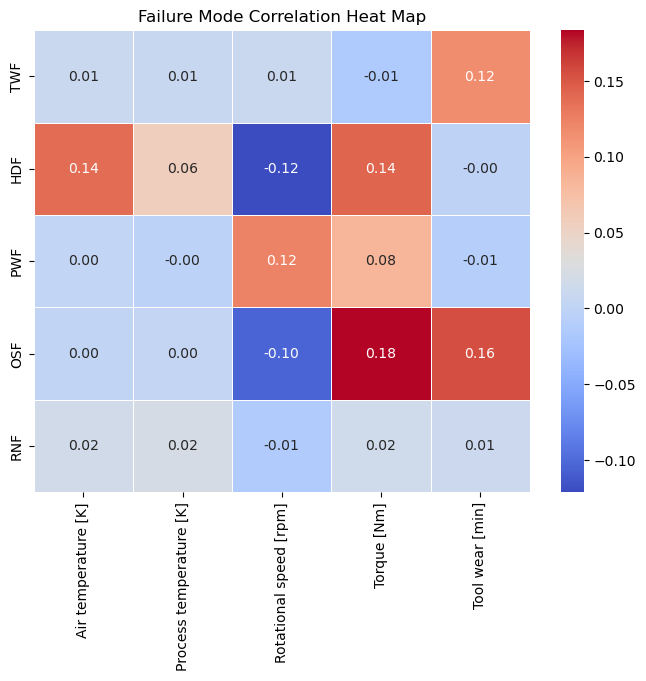

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(failure_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Failure Mode Correlation Heat Map")
plt.show()

**Findings from the correlation analysis:**

1. Tool wear time has a strong positive correlation to Tool Wear Failure (TWF) 0.12, indicating that longer wear time directly causes failures.

2. Both Air temperature and Torque has very strong positive correlation with Head Dissipation Failure (HDF) 0.14, meaning that higher air temperature and torque increases the chance of failure.
3. Rotational speed is negatively correlated with Heat Dissiation Failure 0.10, suggesting lower speed can cause HDF.

5. Both Tool wear time and Torque are strongly correlated to Overstrain failure (OSF) 0.18/0.16, indicating that extra torque and exccesive wear contribute to OSF. However, the roataional speed is negatively correlated to OSF, meaning lower speed contribute further to the failure. 

4. High rotational speed and high torqur are positively correlated to Power Failure (PWF).

6. All the process parameters have weak correlation to the Random Failures (RNF).

**In Nutshell:**

1. TWF is associated with longer wear time.

2. HDF is associated with high air torque and air temperature, and lower rotational speed.

3. PWF is associated with higher rotational speed and higher torque. 

4. OSF is associated with higher torque, longer wear time and lower rotational speed. 

5. RND has minor correlation with process parameters.

## What is The Distribution of Product Quality, How Do They Relate To Failure Rates?

We all know that products comes with high, medium and low quality, but we want to know how reliable each quality type are, and how does the failure distirbution look like with each quality type. First, let's take a look at the distribution of product quality:

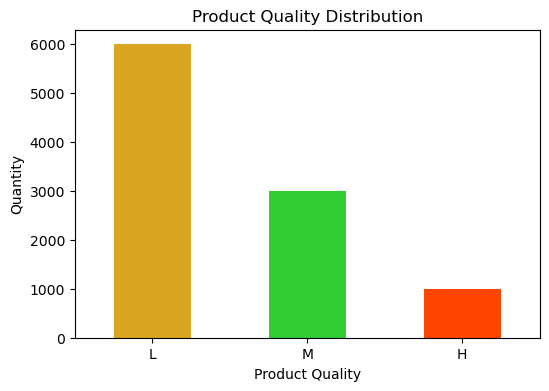

In [42]:
quality=ai['Type'].value_counts()
plt.figure(figsize=(6,4))
quality.plot(kind='bar', color=['goldenrod','limegreen','orangered'])
plt.xlabel("Product Quality")
plt.ylabel("Quantity")
plt.title("Product Quality Distribution")
plt.xticks(rotation=0)
plt.show()

As we can see, we have 6000 products in low quality, 3000 in medium quality and 1000 in high quality. 

We want to see what is the failure rate assocaited with each quality type of products.

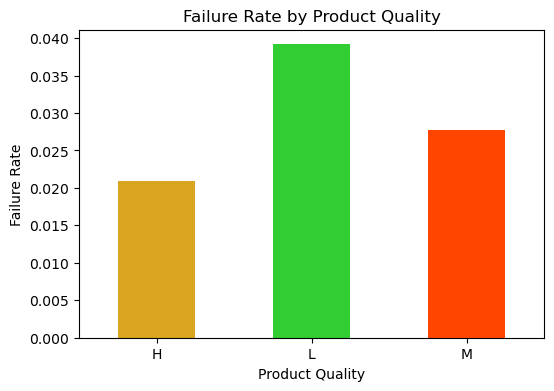

In [47]:
failure_rate=ai.groupby('Type')['Machine failure'].mean()
plt.figure(figsize=(6,4))
failure_rate.plot(kind='bar',color=['goldenrod','limegreen','orangered'])
plt.xlabel("Product Quality")
plt.ylabel("Failure Rate")
plt.title("Failure Rate by Product Quality")
plt.xticks(rotation=0)
plt.show()



As we exptected, the low product quality contributed to majority of the failures. However, the gap between mediaum and high quality product failure rate isn't as much as we expcted. 

## How Does Each Product Quality Type Experince Each Failure Mode Differently? 

We want to investigate that if each product quality type has its own domain of failure. To explore this question, first we need to find out the failure distribution across each different product quality type. This gives us ideas of which failure mode occured more commonly on each quality type.

In [49]:
failure_mode=['TWF','HDF','PWF','OSF','RNF']
failure_quality=ai.groupby('Type')[failure_mode].sum()
failure_total=failure_quality.div(failure_quality.sum(axis=1),axis=0)
print(failure_total)

           TWF       HDF       PWF       OSF       RNF
Type                                                  
H     0.269231  0.307692  0.192308  0.076923  0.153846
L     0.096154  0.292308  0.226923  0.334615  0.050000
M     0.160920  0.356322  0.356322  0.103448  0.022989


Based on the distribution table, we found that different quality types have differnt domain of failure:

High quality products are more common to experince TWF and HDF.

Medium quality products are more common to experince OSF, PWF and HDF.

Low quality products are more common to experince PWF and HDF.

Heat Dissipitation Failure (HDF) are commonly found across every quality type.

To better visulize the distirbution of each failure mode acorss product quality types, I created a stacked bar chart:

failure_total.plot(kind='bar',stacked=True, figsize=(8,6))
plt.xlabel("Quality Type")
plt.ylabel("Failure Proportion")
plt.title("Distribution of Each Failure Mode Across Quality Types")
plt.legend(title="Failure Mode")
plt.xticks(rotation=0)
plt.show()

## How Does Tool Wear Progress Over Time? Can We Find An Optimal Replacement Threshold Before Failure Occure? 

We want to explore if there is a way we could determine an ideal time when we can replace the tool before actual failure happens. To achieve that, we will need to explore how does the tool wear over time.

In [91]:
ai['Tool wear [min]']=pd.to_numeric(ai['Tool wear [min]'], errors='coerce')
failure_wear = ai.groupby(pd.cut(ai["Tool wear [min]"], bins=16))["Machine failure"].mean()
threshold=0.2
o_threshold=failure_wear[failure_wear>threshold].index[0].left
print("Optimal threshold for replace before failure happens:",o_threshold,"minutes.")

Optimal threshold for replace before failure happens: 221.375 minutes.


/var/folders/dz/m8pk5ds97_ddz72w19_7w0z00000gn/T/ipykernel_2267/1119771653.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  failure_wear = ai.groupby(pd.cut(ai["Tool wear [min]"], bins=16))["Machine failure"].mean()


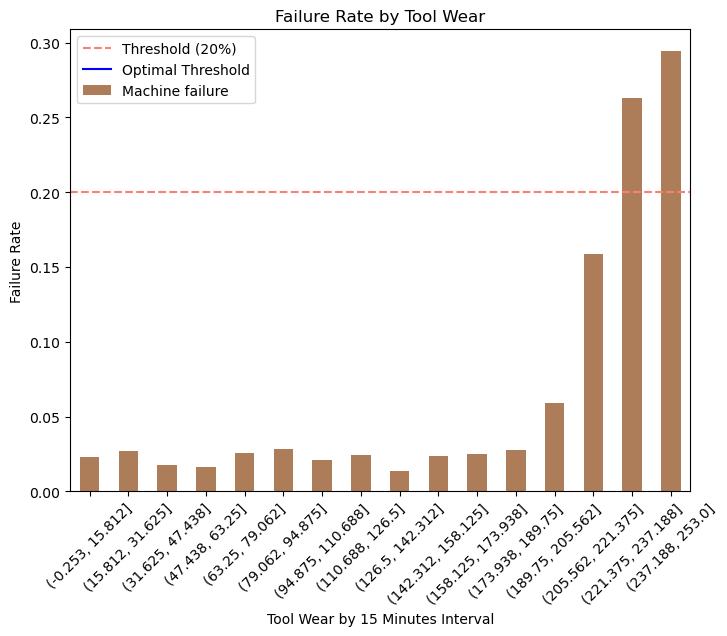

In [94]:
plt.figure(figsize=(8,6))
failure_wear.plot(kind='bar',color='saddlebrown',alpha=0.7)
plt.axhline(y=threshold, color='salmon', linestyle="--",label="Threshold (20%)")
plt.axvline(x=o_threshold, color='blue', linestyle="-",label="Optimal Threshold")
plt.xlabel("Tool Wear by 15 Minutes Interval")
plt.ylabel("Failure Rate")
plt.title("Failure Rate by Tool Wear")
plt.xticks(rotation=45)
plt.legend()
plt.show()

As we can see that, starting from 174 minutes wear time, the failure rate increases drastically, and it reaches to 20% threshold at the time interval 205.62 - 221.38 minutes. Therefore, the optimal time to replace the tool before failure happen would be at 221.38 minutes. 

## Does Power Failure More Likely to Happen at A Speicifc Torque and Speed Point? Can We Determine A Threshold Where Failures About to Happen?

In [4]:
pwf=ai[ai['PWF']==1]
power_fail_stats=pwf[["Rotational speed [rpm]","Torque [Nm]"]].describe()
print("Power Failures Summary")
print(power_fail_stats)

Power Failures Summary
       Rotational speed [rpm]  Torque [Nm]
count               95.000000    95.000000
mean              1763.968421    48.514737
std                620.829138    26.788653
min               1200.000000     3.800000
25%               1312.500000    12.800000
50%               1386.000000    63.600000
75%               2563.500000    68.400000
max               2886.000000    76.600000


This power failures summary gives us a rough idea of the mean and range of rotational speed and torque when power failures happened. 

/var/folders/dz/m8pk5ds97_ddz72w19_7w0z00000gn/T/ipykernel_4232/695664867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=ai["PWF"],y=ai["Rotational speed [rpm]"], palette=["lightcoral","violet"])
/var/folders/dz/m8pk5ds97_ddz72w19_7w0z00000gn/T/ipykernel_4232/695664867.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=ai["PWF"],y=ai["Torque [Nm]"], palette=["lightcoral","violet"])


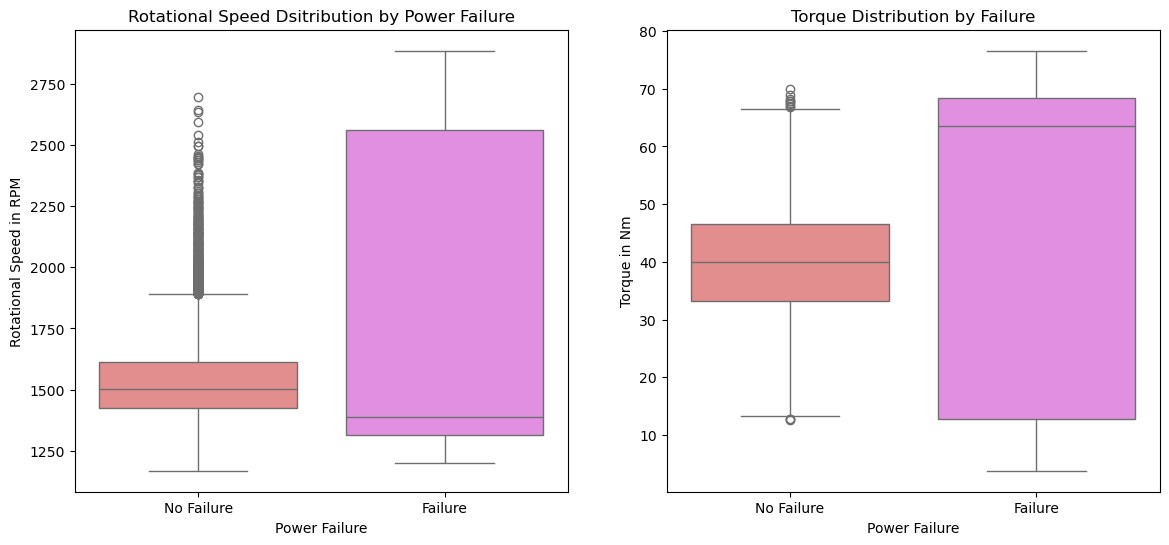

In [22]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x=ai["PWF"],y=ai["Rotational speed [rpm]"], palette=["lightcoral","violet"])
plt.xticks([0,1],["No Failure","Failure"])
plt.xlabel("Power Failure")
plt.ylabel("Rotational Speed in RPM")
plt.title("Rotational Speed Dsitribution by Power Failure")

plt.subplot(1,2,2)
sns.boxplot(x=ai["PWF"],y=ai["Torque [Nm]"], palette=["lightcoral","violet"])
plt.xticks([0,1],["No Failure","Failure"])
plt.xlabel("Power Failure")
plt.ylabel("Torque in Nm")
plt.title("Torque Distribution by Failure")

plt.show()

Based on the above power failure statistics and box plots, we can infer that the power failures are more liky to occure when at the 1200 - 2500 RPM interval rotaitonal speed. For Torque, the power failures are more likely to occure at above 50 Nm since the meadian line is closer to the top. 

## **Modelling Question**

## Can We Predcit Probability of Failure by Using The Process Parameters?

It's important for us to explore if we can create a model to predict the failure porobability using the parameters like air temperature, process temperature, rotaitonal speed, torque and tool wear time. If we could find a way to model the probaility of failure, we can detect machines with high failure risk and better plan for early maintainance before they breakdown. 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.87      0.57      0.69        68

    accuracy                           0.98      2000
   macro avg       0.93      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000

Model Accuracy: 0.9825


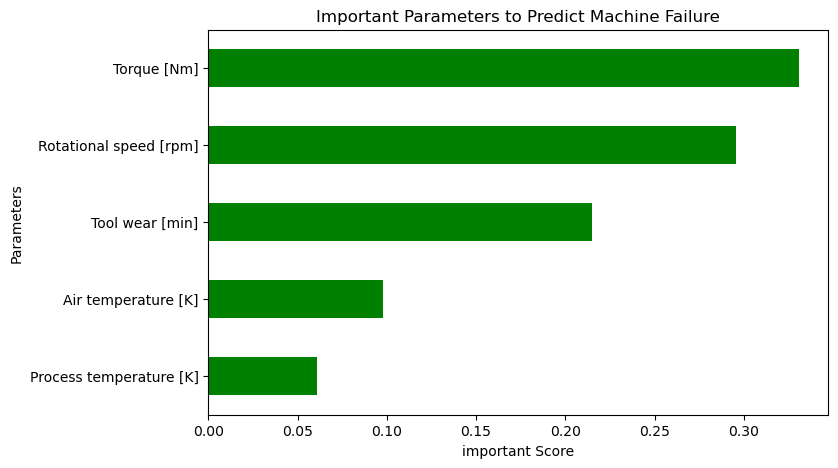

In [30]:
parameters=["Torque [Nm]","Rotational speed [rpm]","Air temperature [K]","Process temperature [K]","Tool wear [min]"]
target="Machine failure"

X_train, X_test, y_train, y_test=train_test_split(ai[parameters],ai[target],test_size=0.2,random_state=42,stratify=ai[target])
model=RandomForestClassifier(n_estimators=200,random_state=42,class_weight='balanced')
model.fit(X_train, y_train)
y_pred_model=model.predict(X_test)
evaluate_model=accuracy_score(y_test, y_pred_model)
report_model=classification_report(y_test,y_pred_model)
print("Classification Report:",report_model)
print("Model Accuracy:",evaluate_model)

parameters_important=pd.Series(model.feature_importances_, index=parameters)
plt.figure(figsize=(8,5))
parameters_important.sort_values().plot(kind="barh",color="green")
plt.xlabel("important Score")
plt.ylabel("Parameters")
plt.title("Important Parameters to Predict Machine Failure")
plt.show()

From the classification report, the accuracy of the model is 98%, suggesting that the model is able to capture 98% cases of machine failures and non-failures. The 87% precision indicating the model is precise at prediction at 87% of time. The percentage of recall is 57%, meaning that the model can capture 57% of actual failures, but this can be further imporved by using more advanced techniques. Predicting the failure rate a head of time using these operational parameters is totally feasiable. From the important parameters plot, we can tell that rotational speed, torque and tool wear are the most important parameters contributing to failures. Machines with high torque and rotational speed are in a higher risk to fail. The machine with worn out tools are also in a high risk of failures. More advanced technique is needed to investigate the interaction between the parameter terms. 

## Conclusions

Tool Wear Failure is associated with longer wear time. Heat Dissipation Failure is caused by high air torque and air temperature, and lower rotational speed. Higher rotational speed and higher torque will contribute to Power Failure. Overstrain Failure is associated with higher torque, longer wear time and lower rotational speed. Randon Failure has minor correlation with process parameters. From the quaity distribution in the dataset, there are about 6/10 products in low quality, nearly 3/10 in medium quality and few 1/10 in high quality. It's within our expectation that the low product quality contributed to majority of the failures. However, the difference in failure rate between mediaum and high quality product isn't as much as we expcted. When we investigate if each quality type product has its domain of failure, we found that high quality products are more common to experince TWF and HDF. Medium quality products are more common to experince OSF, PWF and HDF. Low quality products are more common experince PWF and HDF. Heat Dissipitation Failure (HDF) are commonly found across every quality type. When we explore the tool wear progress over time, we realize that starting from 174 minutes wear time, the failure rate increases drastically. We determined that the optimal time to replace the tool before failure happen would be at 221.38 minutes. The power failures are more likely to happen when at the 1200 - 2500 RPM interval rotaitonal speed and above 50 Nm torque. Using model to predict failure with operational parameters are feasible, as the model results in 98% accuracy and 87% precision. The recall rate is 57% suggesting that more advanced modelling techniques can be used to further imporve the model.

## References:

AI4I 2020 Predictive Maintenance Dataset [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5HS5C.

Matzka, S. (2020). Explainable Artificial Intelligence for Predictive Maintenance Applications. 2020 Third International Conference on Artificial Intelligence for Industries (AI4I), 69-74.

A. Cachada et al., "Maintenance 4.0: Intelligent and Predictive Maintenance System Architecture," 2018 IEEE 23rd International Conference on Emerging Technologies and Factory Automation (ETFA), Turin, Italy, 2018, pp. 139-146, doi: 10.1109/ETFA.2018.8502489.